# Reverse Nodes in k-Group

Given the head of a linked list, reverse the nodes of the list `k` at a time, and return _the modified list_.

`k` is a positive integer and is less than or equal to the length of the linked list. If the number of nodes is not a multiple of `k` then left-out one nodes, in the end, should remain as it is.

You may not alter the values in the list's nodes, only nodes themselves may be changed.

### Example 1

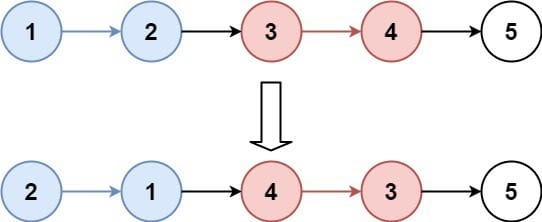

```
Input: head = [1,2,3,4,5], k = 2
Output: [2,1,4,3,5]
```

### Example 2

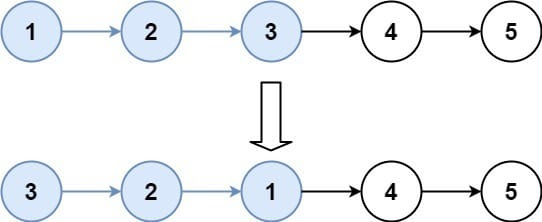

```
Input: head = [1,2,3,4,5], k = 3
Output: [3,2,1,4,5]
```

## Solution

To solve this problem, we'll use an iterative approach that reverses groups of `k` nodes while maintaining the overall structure of the list. 

We'll use a helper function to reverse a portion of the linked list and keep track of the groups of `k` nodes. If the remaining nodes are less than `k`, we'll leave them as they are.

Here is how the solution works:

1. We use a dummy node to handle changes in the list's head

2. We check if we have `k` nodes to reverse

3. We use a separate helper function `reverse` to reverse a portion of the list

4. We keep track of the previous group, current group and next group

5. After reversing, we reconnect the groups

6. If there are fewer than `k` nodes remaining, we leave them as they are

The time complexity of this solution is `O(n)`, where `n` is the number of nodes in the linked list.

In [21]:
class ListNode:
    def __init__(self, val = None, next = None):
        self.val = val
        self.next = next

# Creating linked list from array
def create_LL_from_array(val_list: list[int]):
    # Define the head of the linked list
    head = ListNode(val_list[0], None)
    prev = head

    # Loop through all the values of the val_list and create a new ListNode
    for v in val_list[1:]:
        prev.next = ListNode(v, None)
        prev = prev.next

    return head

# Function to print the LL
def print_ll(head):
    curr = head
    ll_string = ''
    while curr:
        # print(curr.val)
        ll_string += str(curr.val) + (' -> ' if curr.next else '')
        curr = curr.next

    print(ll_string)

# Reverse K groups of Nodes function
def reverse_K_group(head, k):
    # Check if reversal is needed
    if not head or k == 1:
        return head
    
    # Dummy node to handle head changes
    dummy = ListNode(0)
    dummy.next = head
    prev = dummy

    while head:
        # Check if we have k nodes to reverse
        tail = prev
        for i in range(k):
            tail = tail.next
            # If not enough nodes, return
            if not tail:
                return dummy.next
        
        # Store next group's start
        next_group = tail.next

        # Reverse current group
        head, tail = reverse(head, tail)

        # Connect previous group to reversed group
        prev.next = head
        tail.next = next_group
    
        # Move pointers
        prev = tail
        head = tail.next

    return dummy.next

def reverse(head, tail):
    # Reverse a portion of the linked list
    prev = tail.next
    curr = head

    while prev != tail:
        # Store the next node
        next_node = curr.next
        # Reverse current node's pointer
        curr.next = prev
        # Move pointer
        prev = curr
        curr = next_node

    return tail, head

# Create LL from array 
head = create_LL_from_array([1, 2, 3, 4, 5])
print('Linked list before reverse:')
print_ll(head)

# Reverse k group
rev_head = reverse_K_group(head, 2)
print('Linked list after reverse:')
print_ll(rev_head)


Linked list before reverse:
1 -> 2 -> 3 -> 4 -> 5
Linked list after reverse:
2 -> 1 -> 4 -> 3 -> 5
